In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
import os
print(os.listdir('dsfile/'))

['heart.csv', 'tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [4]:
df = pd.read_csv('dsfile/heart.csv')

In [5]:
df.head()
# age - 年龄
# sex -（1 = 男性；0 = 女性）
# cp——胸痛型
# trestbps - 静息血压（入院时以毫米汞柱为单位）
# chol - 血清胆甾醇，单位为 mg/dl
# fbs -（空腹血糖 > 120 mg/dl）（1 = 真；0 = 假）
# restecg - 静息心电图结果
# thalach - 达到最大心率
# exang - 运动诱发的心绞痛（1 = 是；0 = 否）
# oldpeak - 运动相对于休息引起的 ST 压低
# slope - 峰值运动 ST 段的斜率
# ca - 荧光法着色的主要血管数量 (0-3)
# thal - 3 = 正常； 6 = 固定缺陷； 7 = 可逆缺陷
# target - 是否患有疾病（1=是，0=否）


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Data Exploration
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

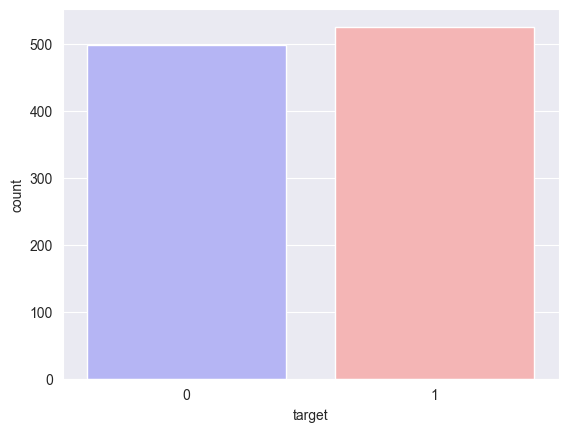

In [7]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [8]:
#统计有病和没病的
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

In [9]:
print(countNoDisease, countHaveDisease)

499 526


In [10]:
print("Percentage of Patients Haven't Heart Disease:{:.2f}".format((countNoDisease / len(df.target)) * 100))
print("Percentage of Patients Have Heart Disease:{:.2f}".format((countHaveDisease / len(df.target)) * 100))

Percentage of Patients Haven't Heart Disease:48.68
Percentage of Patients Have Heart Disease:51.32


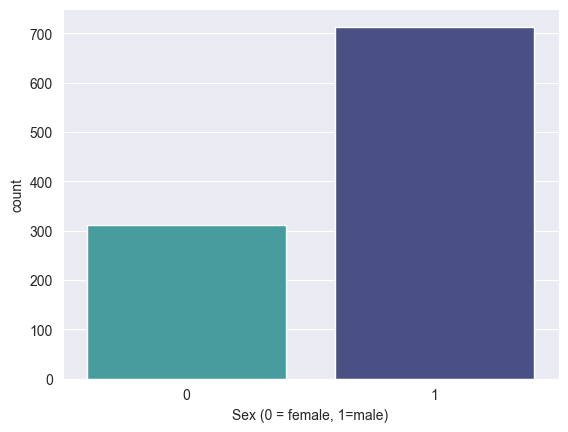

In [11]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1=male)")
plt.show()

In [12]:
# 统计样本中男女数目
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}".format((countFemale / len(df.sex)) * 100))
print("Percentage of Male Patients: {:.2f}".format((countMale / len(df.sex)) * 100))

Percentage of Female Patients: 30.44
Percentage of Male Patients: 69.56


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


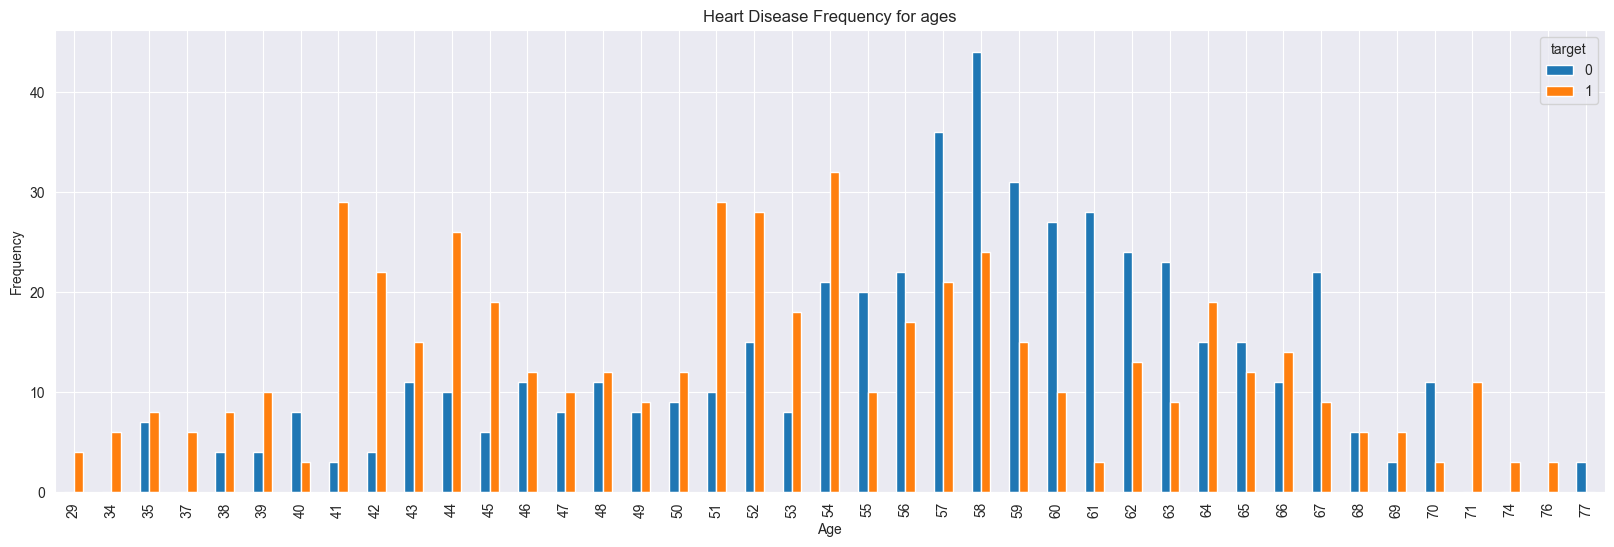

In [14]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for ages')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.savefig('HeartDiseaseAndAges.png')
plt.show()

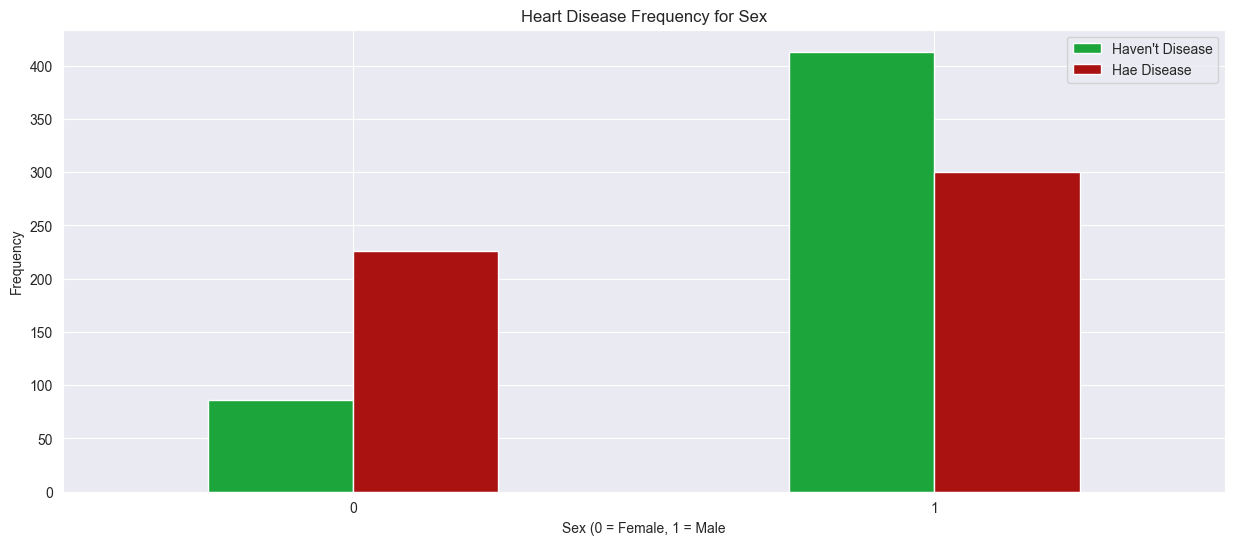

In [15]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15, 6), color=['#1CA53B', "#AA1111"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('Sex (0 = Female, 1 = Male')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Hae Disease"])
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAndSexs.png')
plt.show()

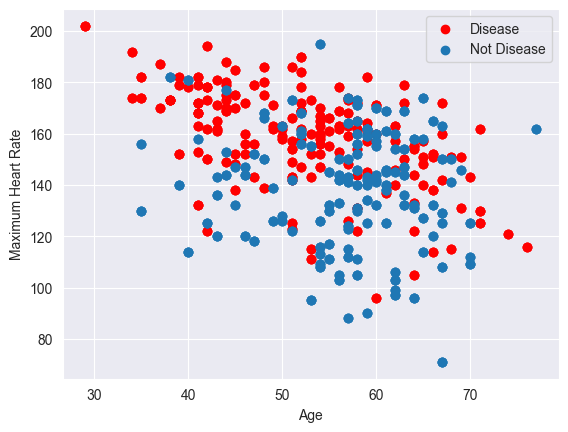

In [16]:
plt.scatter(x=df.age[df.target == 1], y=df.thalach[(df.target==1)], color="red")
plt.scatter(x=df.age[df.target == 0], y=df.thalach[(df.target == 0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

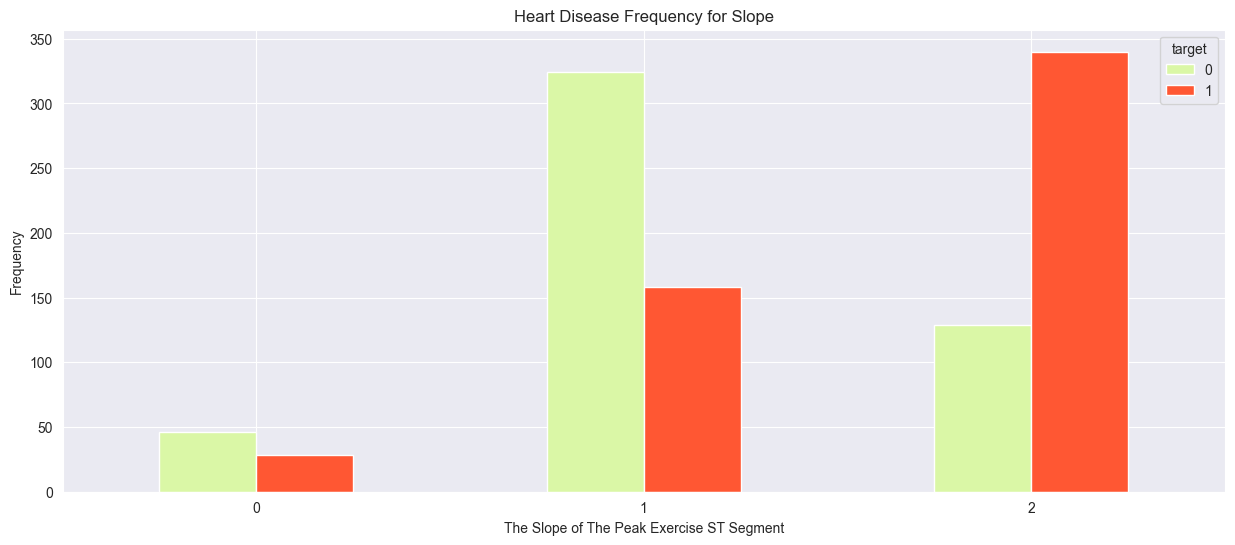

In [17]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6', '#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig("HeartDiseaseFrequencySlope.png")
plt.show()

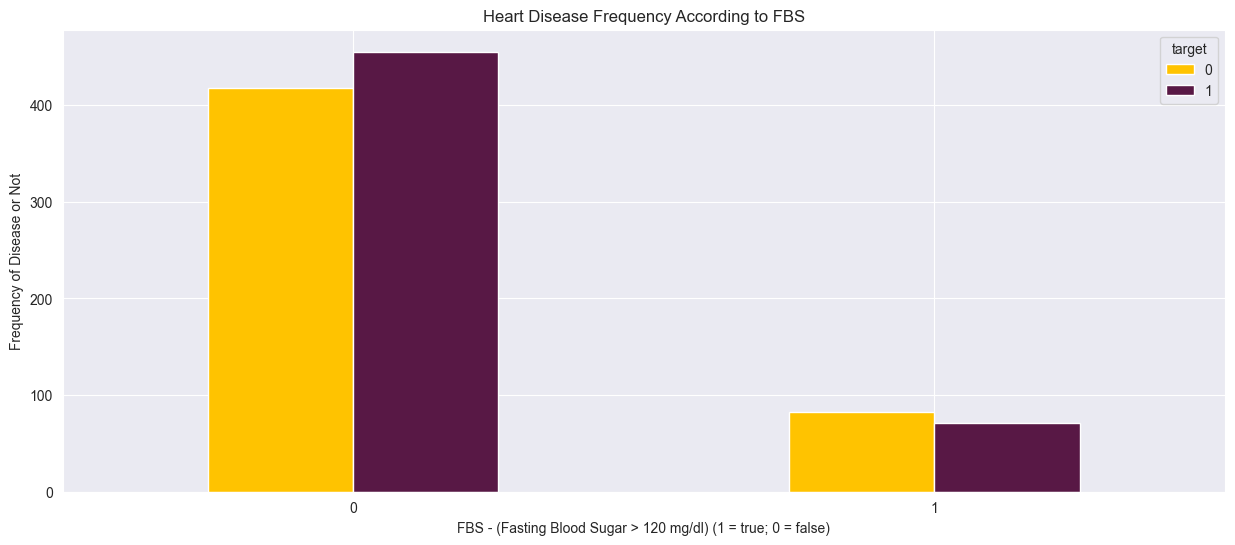

In [18]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15, 6), color=['#FFC300', '#581845'])
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.savefig('FrequencyOfDiseaseOrNot.png')
plt.show()

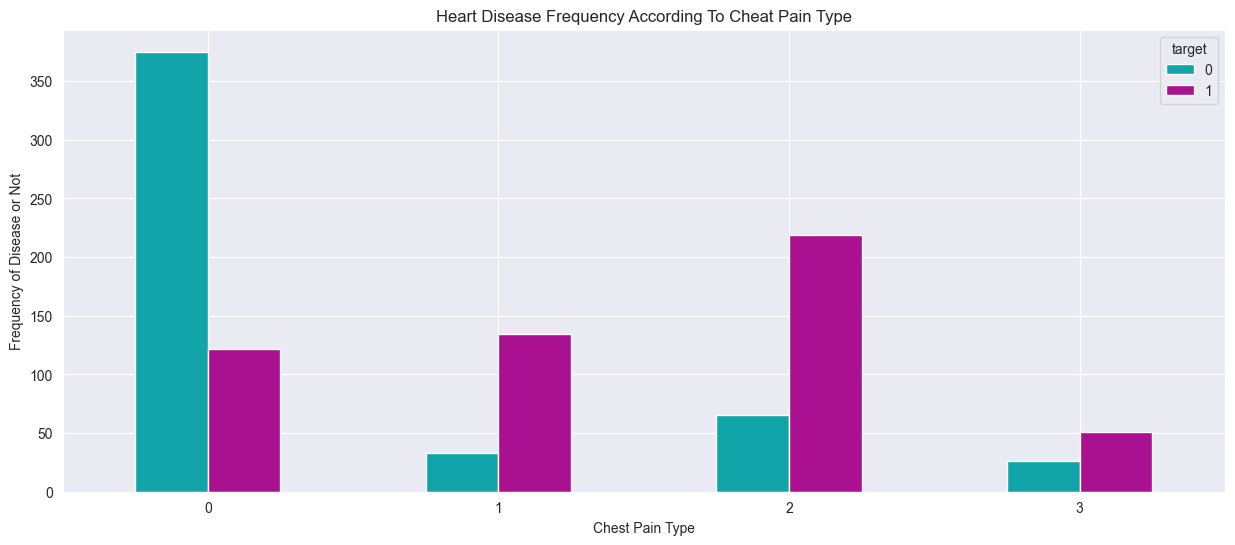

In [19]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15, 6), color=['#11A5AA', '#AA1190'])
plt.title("Heart Disease Frequency According To Cheat Pain Type")
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
#创建虚拟变量
#由于“cp”、“thal”和“slope”是分类变量，我们将把它们变成虚拟变量。
a = pd.get_dummies(df['cp'], prefix= "cp")
b = pd.get_dummies(df['thal'], prefix="thal")
c = pd.get_dummies(df['slope'], prefix="slope")


In [21]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [24]:
#为逻辑回归创建模型
#我们可以使用 sklearn 库，也可以自己编写函数。 让我们都用吧。 首先我们将编写我们的函数，然后我们将使用 sklearn 库来计算分数。
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [25]:
#归一化
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

C:\Users\sanqin4\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\sanqin4\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\sanqin4\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
#制作数据集， 测试集训练集 占比为0.8 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#矩阵转置
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [27]:
def initialize(dimension):

    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [36]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [37]:
def ForwardBackward(weight, bias, x_train, y_train):
    # Forward
    y_head = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias":derivative_bias}

    return cost, gradients

In [46]:
def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []

    for i in range(iteration):
        cost, gradients = ForwardBackward(weight, bias, x_train, y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)
    parameters = {"weight": weight, "bias": bias}

    print("iteration:", iteration)
    print("cost:", cost)

    plt.plot(index, costList)
    plt.xlabel("Number o Iteration")
    plt.ylabel("Lost")
    plt.show()

    return parameters, gradients

In [47]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return y_prediction

In [48]:
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):
    dimension = x_train.shape[0]
    weight, bias = initialize(dimension)

    parameters, gradients = update(weight, bias, x_train, y_train, learningRate, iteration)

    y_prediction = predict(parameters["weight"], parameters["bias"], x_test)

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test)) * 100)))

iteration: 2000
cost: 0.41255404868683215


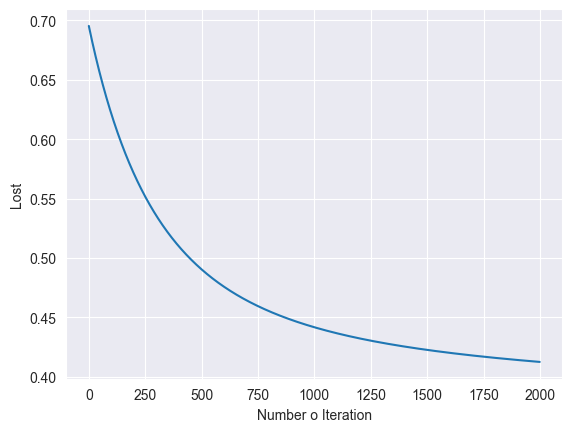

Manuel Test Accuracy: 87.32%


In [55]:
logistic_regression(x_train, y_train, x_test, y_test, 0.01, 2000)

In [56]:
#Sklearn Logistic Regression
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['Logistic Regression'] = acc
print("test Accuracy {:.2f}%".format(acc))

test Accuracy 85.85%
